In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plotting
import PdM_functions as pdm # custom functions created for this project that are used in several notebooks

In [144]:
# Load the data
telemetry = pd.read_csv('data/PdM Azure/PdM_telemetry.csv', sep = ",")
errors = pd.read_csv('data/PdM Azure/PdM_errors.csv', sep = ",")
failures = pd.read_csv('data/PdM Azure/PdM_failures.csv', sep = ",")
machines = pd.read_csv('data/PdM Azure/PdM_machines.csv', sep = ",")
maint = pd.read_csv('data/PdM Azure/PdM_maint.csv', sep = ",")

In [145]:
# Map failures
print('Failure types: ', failures['failure'].unique())
failure_map = {
    'Normal':0, 
    'comp1':1, 
    'comp2':2, 
    'comp3':3,
    'comp4':4
}

Failure types:  ['comp4' 'comp1' 'comp2' 'comp3']


In [146]:
# Map errors
print('Error types: ', errors['errorID'].unique())
error_map = {
    'Normal':0, 
    'error1':1, 
    'error2':2, 
    'error3':3,
    'error4':4,
    'error4':5
}

Error types:  ['error1' 'error3' 'error5' 'error4' 'error2']


In [147]:
# Map model types
print('Model types: ', machines['model'].unique())
model_map = {
    'model1':1, 
    'model2':2, 
    'model3':3, 
    'model4':4
}

Model types:  ['model3' 'model4' 'model2' 'model1']


In [148]:
# Map component reference for maintenance
print('Comp types: ', maint['comp'].unique())
comp_map = {
    'No':0, 
    'comp1':1, 
    'comp2':2, 
    'comp3':3, 
    'comp4':4
}

Comp types:  ['comp2' 'comp4' 'comp3' 'comp1']


In [149]:
machine1 = telemetry.loc[telemetry['machineID'] == 1,:]
failure1 = failures.loc[failures['machineID'] == 1,:].drop('machineID', axis = 1)
error1 = errors.loc[errors['machineID'] == 1,:].drop('machineID', axis = 1)
maint1 = maint.loc[maint['machineID'] == 1,:].drop('machineID', axis = 1)
detail1 =  machines.loc[machines['machineID'] == 1,:]
machine1 = pd.merge(machine1, failure1, on = 'datetime', how = 'left')
machine1['failure'].replace({np.nan: 'Normal'}, inplace=True)
machine1 = pd.merge(machine1, error1, on = 'datetime', how = 'left')
machine1['errorID'].replace({np.nan: 'Normal'}, inplace=True)
machine1 = pd.merge(machine1, maint1, on = 'datetime', how = 'left')
machine1['comp'].replace({np.nan: 'No'}, inplace=True)
machine1 = pd.merge(machine1, detail1, on = 'machineID', how = 'left')
machine1.index = pd.to_datetime(machine1['datetime'], format = '%Y-%m-%d %H:%M:%S')
machine1['failure'] = machine1['failure'].map(failure_map)
machine1['errorID'] = machine1['errorID'].map(error_map)
machine1['model'] = machine1['model'].map(model_map)
machine1['comp'] = machine1['comp'].map(comp_map)
machine1.rename(columns = {'comp': 'maintenance'}, inplace = True)
print(machine1)

                                datetime  machineID        volt      rotate  \
datetime                                                                      
2015-01-01 06:00:00  2015-01-01 06:00:00          1  176.217853  418.504078   
2015-01-01 07:00:00  2015-01-01 07:00:00          1  162.879223  402.747490   
2015-01-01 08:00:00  2015-01-01 08:00:00          1  170.989902  527.349825   
2015-01-01 09:00:00  2015-01-01 09:00:00          1  162.462833  346.149335   
2015-01-01 10:00:00  2015-01-01 10:00:00          1  157.610021  435.376873   
...                                  ...        ...         ...         ...   
2016-01-01 02:00:00  2016-01-01 02:00:00          1  153.724780  450.254337   
2016-01-01 03:00:00  2016-01-01 03:00:00          1  172.418099  375.701907   
2016-01-01 04:00:00  2016-01-01 04:00:00          1  174.588145  460.505353   
2016-01-01 05:00:00  2016-01-01 05:00:00          1  184.224228  438.823315   
2016-01-01 06:00:00  2016-01-01 06:00:00          1 

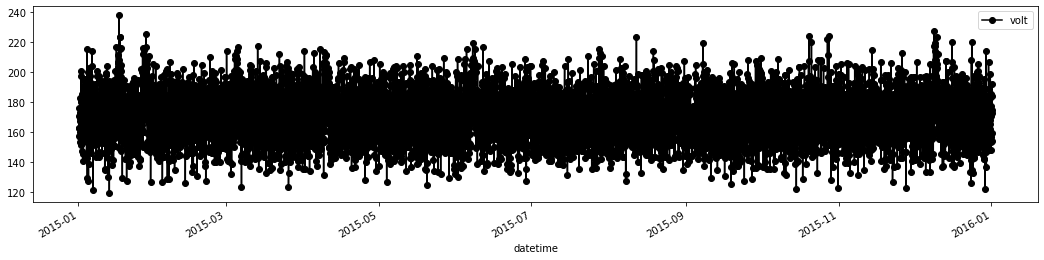

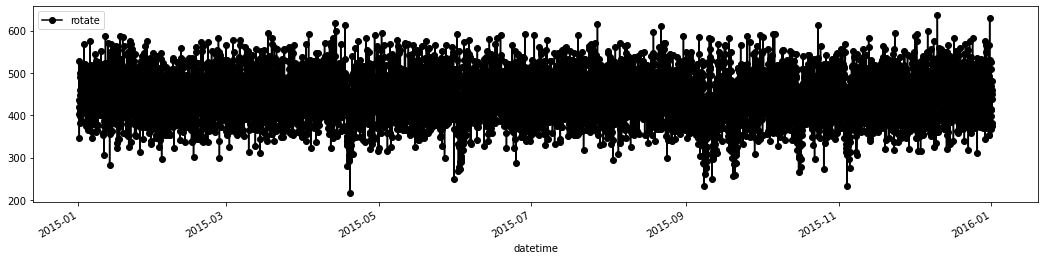

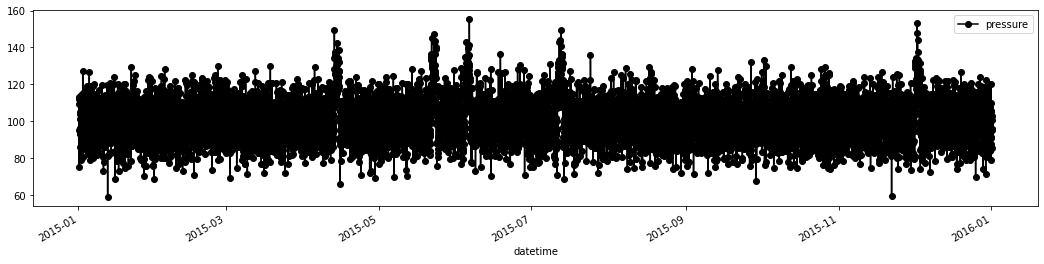

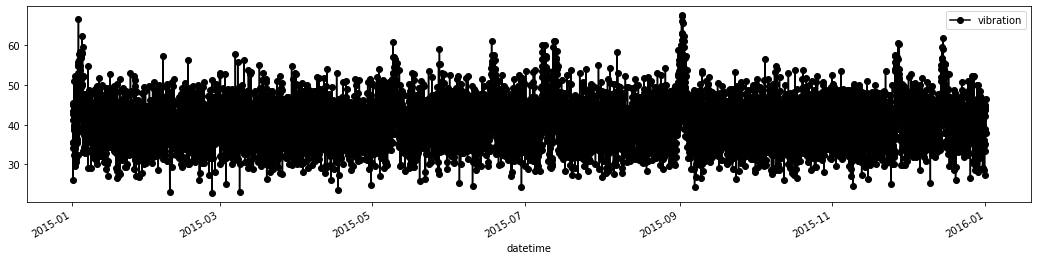

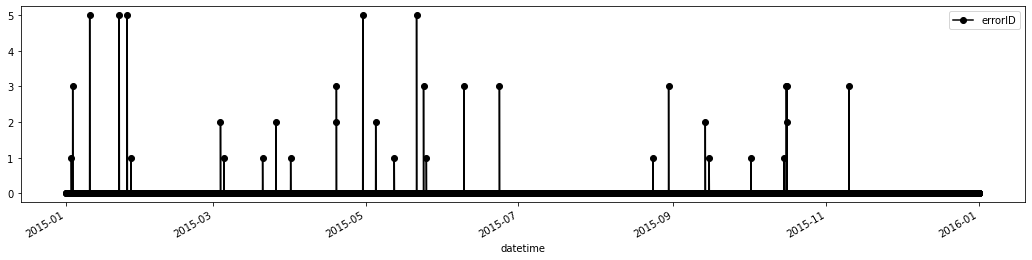

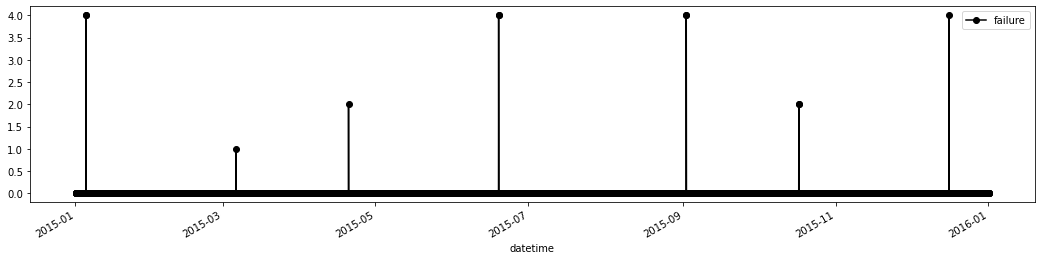

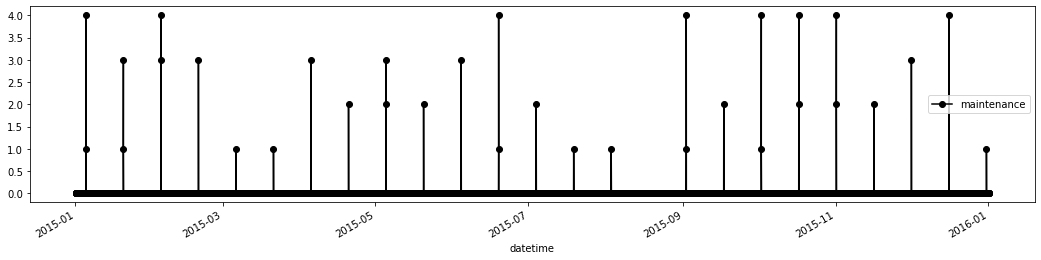

In [150]:
# Check the results of cleaning
plot_chans = ['volt', 'rotate', 'pressure', 'vibration', 'errorID', 'failure', 'maintenance']
for sen in plot_chans:
    machine1[[sen]].plot(figsize = (18, 4), color = 'black', marker = 'o')